In [31]:
import numpy as np
import pandas as pd

In [ ]:
'''
steps:-
1) import the dataset and read it
2) using df.info() check if there are any duplicate or missing values
3) feature engineering, remove the unwanted features and select those which are relevant to us.
4) preprocessing the dataset
5) EDA
6) Extract X (input column) and Y (output column)
7) Scale the features to bring them to a same range of values
8) train test split
9) Train the model
10) Evaluate the model (Testing using test data)
11) deploy the model
'''

In [32]:
df = pd.read_csv('placement (1).csv')

In [33]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [35]:
df.shape

(100, 4)

In [36]:
df.iloc[:, 1: ] #removed the first column named 'unnamed' as it is of no use for prediction

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [37]:
import matplotlib.pyplot as plt

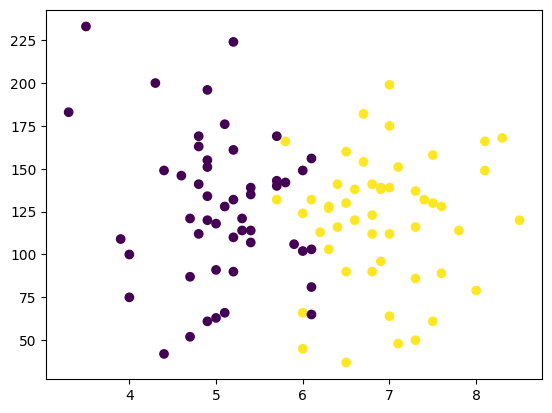

In [38]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [39]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [40]:
X

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)


In [42]:
X_train

,Unnamed: 0,cgpa
99,99,6.2
92,92,5.2
76,76,4.9
14,14,6.1
0,0,6.8
...,...,...
43,43,6.8
22,22,4.9
72,72,7.3
15,15,5.1


In [43]:
Y_train

,placement
99,1
92,0
76,0
14,0
0,1
...,...
43,1
22,0
72,1
15,0


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
X_train

array([[ 1.64777011,  0.16981077],
       [ 1.40420015, -0.69853978],
       [ 0.84746881, -0.95904494],
       [-1.30986512,  0.08297572],
       [-1.79700504,  0.6908211 ],
       [-1.06629516,  0.95132627],
       [-1.69261791,  1.21183143],
       [-0.78792949,  0.86449121],
       [ 0.32553319,  1.12499638],
       [ 0.95185594,  0.43031594],
       [-0.57915524,  0.6908211 ],
       [-1.41425225,  0.77765616],
       [ 1.12583448, -0.2643645 ],
       [-0.26599386,  1.29866649],
       [ 0.74308169, -0.95904494],
       [-1.6230265 ,  0.95132627],
       [-0.92711233, -0.87220989],
       [ 0.88226452,  1.12499638],
       [ 0.7778774 ,  0.60398605],
       [ 0.36032889, -0.00385934],
       [ 0.46471602,  1.81967682],
       [-1.76220933, -0.09069439],
       [-1.17068229, -1.74056044],
       [-0.12681103,  0.51715099],
       [-0.54435953, -0.2643645 ],
       [ 0.91706023,  0.08297572],
       [-1.58823079, -0.2643645 ],
       [ 1.29981303, -0.95904494],
       [ 1.36940444,

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
clf = LogisticRegression()
clf.fit(X_train,Y_train)
'''
clf is an object of LogisticRegression class.
'''

LogisticRegression()

In [49]:
Y_pred = clf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred) #comparing the actual o/p with the predicted o/p. they are 80% similar.

0.8

<Axes: >

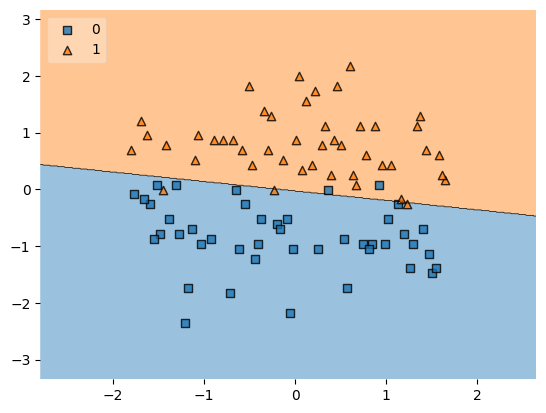

In [51]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [53]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))
'''
with the help of pickle library, i made the clf object, which stores the model, a downloadable file. this file can then be
used in any environment.
'''

'\nwith the help of pickle library, i made the clf object, which stores the model, a downloadable file. this file can then be \nused in any environment. \n'